<a href="https://colab.research.google.com/github/punitgiri921/Insurance-Claims-Data-Pre-Processing/blob/main/Insurance_Claims_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Claims & Customer Data – Practice Questions (No Solutions)


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use local relative path for portability
base_folder = Path("./data")

customers = pd.read_csv(base_folder / "messy_customers_50.csv")
claims = pd.read_csv(base_folder / "messy_claims_70.csv")



# 1.1 Inspect file structure


In [ ]:
# Check number of rows/columns ✅

print(f"No of rows in Customers table: {customers.shape[0]}")
print(f"No of columns in Customers table: {customers.shape[1]}")

print(f"No of rows in claims table: {claims.shape[0]}")
print(f"No of columns in claims table: {claims.shape[1]}")

No of rows in Customers table: 50
No of columns in Customers table: 5
No of rows in claims table: 70
No of columns in claims table: 6


In [ ]:
# Verify column names (spaces, casing, special characters)
print(customers.columns)
print(claims.columns)


Index(['customer_id', 'customer_name', 'age', 'gender', 'region'], dtype='object')
Index(['claim_id', 'customer_id', 'claim_date', 'claim_amount', 'claim_type',
       'status'],
      dtype='object')


In [ ]:
# Detect duplicate or malformed column names
customers.columns[customers.columns.duplicated()]
claims.columns[claims.columns.duplicated()]
#OR
print(customers.columns.value_counts())
print(claims.columns.value_counts())

customer_id      1
customer_name    1
age              1
gender           1
region           1
Name: count, dtype: int64
claim_id        1
customer_id     1
claim_date      1
claim_amount    1
claim_type      1
status          1
Name: count, dtype: int64


# 1.2 Examine datatypes


In [ ]:
# Check if numeric columns are stored as text

customers.info() # ages is object because the way values are stored
                 # gender,region should be stored as categories, name as string


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    50 non-null     object
 1   customer_name  50 non-null     object
 2   age            35 non-null     object
 3   gender         48 non-null     object
 4   region         50 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


In [ ]:
# Check if dates are stored as strings
claims.info() # yes date is object and not datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   claim_id      70 non-null     object 
 1   customer_id   70 non-null     object 
 2   claim_date    50 non-null     object 
 3   claim_amount  42 non-null     float64
 4   claim_type    70 non-null     object 
 5   status        65 non-null     object 
dtypes: float64(1), object(5)
memory usage: 3.4+ KB


In [ ]:
# Identify categorical columns with inconsistent formats

# Customers -> gender,region are inconsistent
# claims -> claim_type, status are inconsistent

# **1.3 Check missing values**



In [ ]:
# Count missing values per column
print(customers.isna().sum())
print(claims.isna().sum())


customer_id       0
customer_name     0
age              15
gender            2
region            0
dtype: int64
claim_id         0
customer_id      0
claim_date      20
claim_amount    28
claim_type       0
status           5
dtype: int64


In [ ]:
# Detect fake missing values:
#   `" "`, `""`, `"?"`, `"N/A"`, `"None"`
fake_values = [" ", "", "?", "N/A", "None" , "Unknown"]

maskcs = customers.isin(fake_values)
maskcl = claims.isin(fake_values)

customers[maskcs.any(axis = 1)]

,customer_id,customer_name,age,gender,region
0,C001,Krish??,34,,west
7,C-008,Asha,?,MALE,East
8,C-009,IshaM,?,Unknown,NORTH??
11,C-012,Krish??,50,Unknown,South
13,c014,RaviV,?,,South
16,C017,ISHA,?,M,south
17,c018,Manav,?,Male,North
18,c019,AadilQ,?,,West
19,C020,ANYA,?,MALE,N.East
28,C029,Anya,NaN,,south-east?


In [ ]:
claims[maskcl.any(axis = 1)]


,claim_id,customer_id,claim_date,claim_amount,claim_type,status
17,CLM018,C024??,2024/01/19,-154.0,AccidEnt,Unknown
29,CLM030??,CO4O,31-01-2024,NaN,Weather?,Unknown
32,CLM033??,c007,NaN,NaN,theft?,Unknown
53,CLM054,C034,2024-02-24,NaN,fire,Unknown
64,clm065,C039??,NaN,NaN,weather,Unknown
65,CLM066??,CO32,07-01-2024,NaN,weather,Unknown
66,CLMO67,CO17,NaN,5750.0,weather,Unknown


## 3. Feature Engineering & Aggregation
- Q11: Group by region and claim_month to compute total number of claims.
- Q12: Compute total claim amount per region‑month.
- Q13: Create a pivot table showing average claim amount by claim_type for each region‑month.
- Q14: Create a pivot table counting claims by status (Approved, Denied, Pending) per region‑month.
- Q15: Combine all aggregated outputs into one final report dataframe.

## 4. Exporting
- Q16: Ensure all numeric values are rounded to 2 decimals.
- Q17: Export the final report as `submission.csv` with correct column order.
- Q18: Verify that the final file contains no missing values.


#1.4 Check uniqueness of IDs


In [ ]:
# BEFORE CHECKING UNIQUENESS FIRST REMOVE SPECIAL CHARACTER AND SPACES
def clean_columns(df, cols):
    for c in cols:
        df[c] = (df[c]
                .astype(str)
                .str.replace(r'[^A-Za-z0-9 ]' , '', regex = True)
                .str.replace(r'\s+' , ' ' , regex = True)
                .replace(['Unknown', 'N/A', 'null', 'nan', 'NA' ,''] , pd.NA)
                .str.strip()

    )

    return df

In [ ]:
cust_cols = customers.columns
clean_columns(customers, cust_cols);


In [ ]:
claims_cols = ['claim_id', 'customer_id',
               # 'claim_date',
               'claim_amount', 'claim_type', 'status']
clean_columns(claims, claims_cols);


In [ ]:
# Verify if customer_id and claim_id are unique
# Identify corrupted or duplicated IDs
# THESE STEP I WILL DO AFTER CLEANING


#1.5 Explore category inconsistencies
Look for inconsistent formatting in:


In [ ]:
# Gender (M, male, FEMALE, empty, etc.)
customers['gender'] = (customers['gender']
                       .str.lower()
                       .replace(
                           {'m' : 'Male',
                           'f' : 'Female',
                           'female' : 'Female',
                           'male' : 'Male',
                            '' : pd.NA
                            }
                          )
                       )
customers['gender'].unique()


array([<NA>, 'Female', 'Male'], dtype=object)

In [ ]:
# Region (North, north, NORTH??, W3st)
customers['region'] = (customers['region']
                      .str.lower()
                      .replace({
                          'west' : 'West',
                          'w3st' : 'West',
                          'east' : 'East',
                          'south' : 'South',
                          'north' : 'North',
                          'southeast' : 'SouthEast',
                          'neast' : 'NorthEast',
                          'NEast' : 'NorthEast',
                          'northeast' : 'NorthEast',

                      })
                      )
customers['region'].unique()


array(['West', 'NorthEast', 'East', 'North', 'South', 'SouthEast'],
      dtype=object)

In [ ]:
# Claim types (accident, AccidEnt, theft?, etc.)
claims['claim_type'] = (claims['claim_type']
                        .str.title()
                        )


claims['claim_type'].unique()


array(['Theft', 'Weather', 'Other', 'Accident', 'Fire'], dtype=object)

In [ ]:
# Status (Approved, APPROVED, " ", Unknown)
claims['status'] = (claims['status']
                    .str.title()
                    )
claims['status'].unique()

array([<NA>, 'Approved', 'Denied', 'Pending'], dtype=object)

#1.6 Validate numeric columns


In [ ]:
# Check for negative values
#AFTER CONVERTING DATATYPE

In [ ]:
# Check if numbers include text ("2500.50", "0", "N/A")
#AFTER CONVERTING DATATYPE

In [ ]:
# Identify zeros that may be invalid
#AFTER CONVERTING DATATYPE

#2.1 Clean column names


In [ ]:
# Remove whitespace
# Fix special characters
# Convert to lowercase or consistent format

customers.columns = (customers.columns
                     .str.lower()
                     .str.replace(r'[^A-Za-z0-9 _]' , '', regex = True)
                     .str.replace(r'\s+' , ' ', regex = True)
                     .str.strip()
                     .str.replace(' ', '_')
                    )


#2.2 Clean customer_id and claim_id


In [ ]:
# Remove extra spaces (func 1.4)
# Remove symbols like "??", " " (func 1.4)
# Fix c001 → C001
# Fix C-003 → C003
# Fix C00O3 (O instead of 0) → C003
customers['customer_id'] = customers['customer_id'].str.replace('O','0').str.upper()
customers['customer_name'] = customers['customer_name'].str.title()

claims['claim_id'] = claims['claim_id'].str.replace('O','0').str.upper()
claims['customer_id'] = claims['customer_id'].str.replace('O','0').str.upper()

#2.3 Standardize textual fields


In [ ]:
#EVRYTHING DONE IN SECTION 1.5
# Customer names
# Trim spaces
# Convert to Title Case
# Remove special characters
# Gender
# Standardize to:

# "M"
# "F"
# Convert:

# "male" → "M"
# "FEMALE" → "F"
# empty/unknown → maybe "U" or NaN
# Region
# Trim spaces
# Fix casing
# Normalize typos: "NORTH??" → "North" "south-east?" → "South-East" or "South" "W3st" → "West"

# 2.4 Clean age


In [ ]:
# Remove text ("30 yrs" → 30)
# Replace "?", "N/A", " " with NaN
# Convert to numeric

customers['age'] = (
    customers['age']
        .str.replace(' yrs', '', regex=False)
        .str.replace('twenty five', '25', regex=False)
)

# convert to integer with support for <NA>
customers['age'] = pd.to_numeric(customers['age'], errors='coerce').astype('Int64')


In [ ]:
# Validate age range (18–100)

customers[~customers['age'].between(18,100)]

,customer_id,customer_name,age,gender,region


In [ ]:
claims['claim_date'].isna().sum()

np.int64(20)

# 2.5 Clean claim_date


In [ ]:
claims['_original_claim_date_str'] = (claims['claim_date']
                                     .astype('str')
                                     .str.strip()
                                     .str.replace('/', '-')
                                      )
claims['_original_claim_date_str'] = pd.to_datetime(claims['claim_date'],
                                                    format='mixed' ,      # Very important to specify
                                                    dayfirst= False)

claims['claim_date'] = claims['_original_claim_date_str']
claims.drop(columns= '_original_claim_date_str' , inplace = True)
claims

,claim_id,customer_id,claim_date,claim_amount,claim_type,status
0,CLM001,C019,NaT,67090,Theft,<NA>
1,CLM002,C002,2024-01-03,<NA>,Weather,Approved
2,CLM003,C019,2024-01-04,00,Weather,Approved
3,CLM004,C002,2024-01-05,<NA>,Other,Denied
4,CLM005,C038,2024-06-01,<NA>,Other,Denied
...,...,...,...,...,...,...
65,CLM066,C032,2024-07-01,<NA>,Weather,<NA>
66,CLM067,C017,NaT,57500,Weather,<NA>
67,CLM068,C002,2024-09-01,<NA>,Fire,Approved
68,CLM069,C019,2024-03-10,96730,Theft,Approved


In [ ]:
# claims['_original_claim_date_str'] = claims['claim_date'].astype(str)

# claims['_cleaned_claim_date_str'] = claims['_original_claim_date_str'].str.replace(r'[^0-9/-]', '', regex=True).str.strip()

# # First pass - Convert to datetime, trying to infer format and prioritizing dayfirst
# parsed_dates_dayfirst = pd.to_datetime(claims['_cleaned_claim_date_str'], errors='coerce', dayfirst=True)

# # Second pass - For values that are still NaT, try converting again without dayfirst=True
# unparsed_mask = parsed_dates_dayfirst.isna()
# parsed_dates_nofirst = pd.to_datetime(claims.loc[unparsed_mask, '_cleaned_claim_date_str'], errors='coerce', dayfirst=False)

# # Combine the results, prioritizing dayfirst parsing if successful
# claims['cleaned_claim_date'] = parsed_dates_dayfirst.fillna(parsed_dates_nofirst)

# # Drop temporary columns
# claims = claims.drop(columns=['_original_claim_date_str', '_cleaned_claim_date_str'])

#2.6 Clean claim_amount


In [ ]:
# Convert to numeric
# Replace "N/A", "", " " with NaN
# Convert column to float
claims['claim_amount'] = pd.to_numeric(claims['claim_amount'], errors= 'coerce')

# Remove negative or zero amounts if invalid

#2.7 Clean claim_type


In [ ]:
#DONE IN SECTION 1.5
# Remove spaces
# Remove symbols (" theft? " → "theft" )
# Convert to lowercase then map to allowed categories:
# Accident
# Fire
# Theft
# Other
# Weather
# Everything else → "Other"

#2.8 Clean status


In [ ]:
#DONE IN SECTION 1.5
# Normalize to:

# "Approved"
# "Denied"
# "Pending"
# Remove invalid/blank statuses

#3.1 Remove invalid claims


In [ ]:
claims['amount_missing_flag'] = (
    claims['status'].eq('Approved') &
    (claims['claim_amount'].isna() | (claims['claim_amount'] == 0))
)

flagged_data_for_follow_up = claims[claims['amount_missing_flag'] == True]
flagged_data_for_follow_up


,claim_id,customer_id,claim_date,claim_amount,claim_type,status,amount_missing_flag
1,CLM002,C002,2024-01-03,NaN,Weather,Approved,True
2,CLM003,C019,2024-01-04,0.0,Weather,Approved,True
6,CLM007,C011,2024-01-08,NaN,Accident,Approved,True
10,CLM011,C027,2024-01-12,NaN,Other,Approved,True
13,CLM014,C034,NaT,NaN,Theft,Approved,True
25,CLM026,C038,2024-01-27,0.0,Fire,Approved,True
26,CLM027,C020,2024-01-28,0.0,Weather,Approved,True
27,CLM028,C002,2024-01-29,0.0,Theft,Approved,True
31,CLM032,C007,2024-02-01,0.0,Theft,Approved,True
39,CLM040,C046,2024-10-01,NaN,Theft,Approved,True


In [ ]:
from math import nan
# Claims with missing or invalid customer IDs
# Claims with invalid dates
# Claims with invalid amounts
maskid =  claims['customer_id'].isin(customers['customer_id'])

from datetime import datetime

maskdate = ( (claims['claim_date'] >= datetime(2020, 1, 1)) & (claims['claim_date'] <= datetime(2025, 1, 1))   )

approved_missing_amt = claims['amount_missing_flag']

claims = claims[maskid & maskdate & ~approved_missing_amt]
final_claims = claims[claims['claim_amount'].gt(0)]
final_claims



,claim_id,customer_id,claim_date,claim_amount,claim_type,status,amount_missing_flag
5,CLM006,C013,2024-01-07,1030.0,Other,Approved,False
7,CLM008,C038,2024-09-01,81945.0,Fire,Pending,False
11,CLM012,C012,2024-01-13,5710.0,Fire,Denied,False
12,CLM013,C040,2024-01-14,92530.0,Fire,Pending,False
16,CLM017,C006,2024-01-18,3350.0,Accident,Pending,False
17,CLM018,C024,2024-01-19,1540.0,Accident,<NA>,False
18,CLM019,C002,2024-01-20,59065.0,Other,Denied,False
30,CLM031,C016,2024-02-01,7520.0,Weather,Denied,False
33,CLM034,C032,2024-02-04,37435.0,Accident,<NA>,False
34,CLM035,C039,2024-02-05,64050.0,Accident,<NA>,False


In [ ]:
#Save final clean datasets

cleaned_customers  = customers.to_csv(base_folder / 'cleaned_customers.csv')
cleaned_claims  = claims.to_csv( base_folder /  'cleaned_claims.csv')

# 3.2 Merge customers & claims


In [ ]:
# Use cleaned customer_id
# Ensure no mismatches after cleaning
df = customers.merge(final_claims, on='customer_id')
df.head(2)

,customer_id,customer_name,age,gender,region,claim_id,claim_date,claim_amount,claim_type,status,amount_missing_flag
0,C002,Neha,49,Female,West,CLM019,2024-01-20,59065.0,Other,Denied,False
1,C006,Sana,<NA>,Female,East,CLM017,2024-01-18,3350.0,Accident,Pending,False


#3.3 Create additional fields


In [ ]:
# Extract claim_month from claim_date
# Create region–month combination keys

df['month'] = df['claim_date'].dt.month
df['region_month'] = df['month'].astype(str) + '_' + df['region'].astype(str)


#3.4 Aggregate for reporting


Total number of Approved claims: 7 

Total claim amount: 333305.0
------------------------------



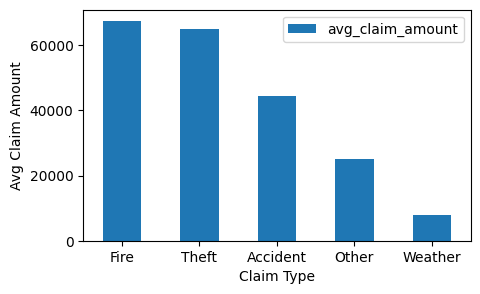

In [ ]:
# Total number of Approved claims
print(f'Total number of Approved claims: {df[df['status']=='Approved'].shape[0]} \n')
# Total claim amount

print(f'Total claim amount: {df[df['status']=='Approved']['claim_amount'].sum()}')

print('------------------------------\n' )

# Average amount by claim_type
(df
 .groupby('claim_type')[['claim_amount']]
 .mean()
 .round(2)
 .sort_values('claim_amount' ,ascending= False)

 .rename(columns= {'claim_amount' : 'avg_claim_amount'})
 ).plot.bar(figsize = (5,3),
     ylabel = 'Avg Claim Amount',
    xlabel = 'Claim Type')


plt.xticks(rotation=0);

sns.set_theme(style="darkgrid")

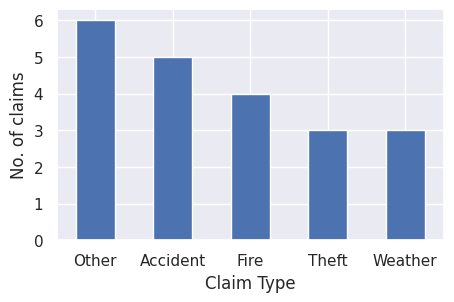

In [ ]:
# Count by status
count_by_status =(df['claim_type']
 .value_counts()
 .rename('no_of_claims')
 ).plot.bar(figsize = (5,3))

plt.ylabel('No. of claims')
plt.xlabel('Claim Type')
plt.xticks(rotation = 0);


# 3.5 Feature Engineering & Aggregation


In [ ]:
# Group by region and claim_month to compute total number of claims.
(df.groupby(['region', 'month'])[['claim_id']]
   .agg('count')
   .rename(columns = {'claim_id' : 'customer_count'})
   ).reset_index()

,region,month,customer_count
0,East,1,3
1,East,2,1
2,North,1,1
3,North,2,3
4,NorthEast,1,1
5,NorthEast,2,1
6,South,1,1
7,West,1,2
8,West,2,3
9,West,3,3


In [ ]:
#Compute total claim amount per region‑month.
claim_by_region_month = (df.groupby(['region', 'month'])['claim_amount']
   .sum()
).reset_index()

display(claim_by_region_month
        .style
        .bar(subset = ['claim_amount'] , align= 'left', color= 'grey')
        .format({'claim_amount' : '{:,.0f} र'}, na_rep= 0)

)

,region,month,claim_amount
0,East,1,"165,205 र"
1,East,2,"1,245 र"
2,North,1,"116,400 र"
3,North,2,"44,335 र"
4,NorthEast,1,"1,030 र"
5,NorthEast,2,"89,820 र"
6,South,1,"5,710 र"
7,West,1,"60,605 र"
8,West,2,"77,900 र"
9,West,3,"120,230 र"


In [ ]:
#Create a pivot table showing average claim amount by claim_type for each region.
avg_by_region_ctype = (df.pivot_table(
    index = 'region',
    columns = 'claim_type',
    values = 'claim_amount',
    aggfunc = 'mean'
))

display(
    avg_by_region_ctype
        .style
        .format({col: '{:,.0f} र'.format for col in avg_by_region_ctype.columns}, na_rep=0)
        .background_gradient(cmap='Grays', axis='index')
)


claim_type,Accident,Fire,Other,Theft,Weather
region,,,,,
East,"3,350 र","92,530 र","69,325 र","1,245 र",0
North,"76,918 र",0,"5,600 र",0,"1,300 र"
NorthEast,0,"89,820 र","1,030 र",0,0
South,0,"5,710 र",0,0,0
West,"32,795 र","81,945 र","24,775 र","96,865 र","11,045 र"


In [ ]:
#Create a pivot table counting claims by status (Approved, Denied, Pending) per month.
claims_by_status_mo= (df.pivot_table(
    index = df['claim_date'].dt.to_period('M').dt.start_time,
    columns = 'status',
    values = 'claim_id',
    aggfunc = 'count'
   )
)
claims_by_status_mo.style.background_gradient(cmap = 'Greys')

status,Approved,Denied,Pending
claim_date,,,
2024-01-01 00:00:00,2.000000,3.000000,2.000000
2024-02-01 00:00:00,2.000000,3.000000,nan
2024-03-01 00:00:00,2.000000,1.000000,nan
2024-09-01 00:00:00,1.000000,nan,1.000000
